In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create a folder, and give path here
%cd /content/drive/MyDrive/yolov4_helmet_detection

/content/drive/MyDrive/yolov4_helmet_detection


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15442, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 15442 (delta 1), reused 6 (delta 0), pack-reused 15424
Receiving objects: 100% (15442/15442), 14.07 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (10366/10366), done.
Checking out files: 100% (2051/2051), done.


In [ ]:
%cd darknet/
# change default values of makefile for our operation
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

[Errno 20] Not a directory: 'darknet/'
/content/drive/MyDrive/yolov4_helmet_detection/darknet


In [ ]:
!make

In [ ]:
# Use pre-trained weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# change the permission to darknet folder
%cd darknet/
!chmod +x ./darknet

/content/drive/MyDrive/yolov4_helmet_detection/darknet


In [ ]:
# split train/test .txt files
#!python split_process.py

In [ ]:
# Train the model
!./darknet detector train data/yolov4_data.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# check the performance of all the trained weights
imShow('chart.png')

In [ ]:
# changing 'yolov4-custom.cfg' file, for testing
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/yolov4_helmet_detection/darknet/cfg
/content/drive/MyDrive/yolov4_helmet_detection/darknet


In [ ]:
# enable GPU, opencv and CUDNN
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!make

In [ ]:
!./darknet detector test data/yolov4_data.data cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4_helmet_detection/darknet/backup/yolov4-custom_best.weights /content/drive/MyDrive/yolov4_helmet_detection/darknet/data/yolov4_data/hard_hat_workers0.png -thresh 0.3

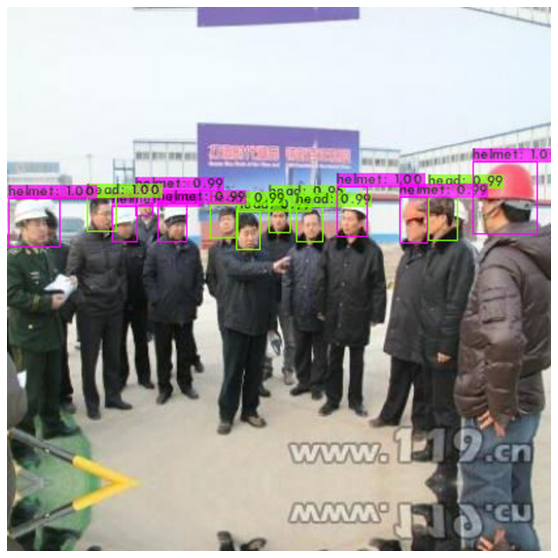

In [ ]:
# view predicted image
imShow('predictions.jpg')    